# Problem Statement:
- You are working as a data scientist in a
global finance company. Over the
years, the company has collected basic
bank details and gathered a lot of
credit-related information. The
management wants to build an
intelligent system to segregate the
people into credit score brackets to
reduce the manual efforts. Given a
person’s credit-related information,
build a machine learning model that
can classify the credit score.

# Dataset Information:
- Credit score dataset contains 1 lac records with 28 features.

| **Attribute**                  | **Description**                                                        |
| ------------------------------ | ---------------------------------------------------------------------- |
| **ID**                         | Unique identification of an entry                                      |
| **Customer\_ID**               | Unique identification of a person                                      |
| **Month**                      | Month of the year                                                      |
| **Name**                       | Name of a person                                                       |
| **Age**                        | Age of the person                                                      |
| **SSN**                        | Social security number of a person                                     |
| **Occupation**                 | Occupation of the person                                               |
| **Annual\_Income**             | Annual income of the person                                            |
| **Monthly\_Inhand\_Salary**    | Monthly base salary of the person                                      |
| **Num\_Bank\_Accounts**        | Number of bank accounts a person holds                                 |
| **Num\_Credit\_Card**          | Number of other credit cards held by a person                          |
| **Interest\_Rate**             | Interest rate on credit card                                           |
| **Num\_of\_Loan**              | Number of loans taken from the bank                                    |
| **Type\_of\_Loan**             | Types of loan taken by a person                                        |
| **Delay\_from\_due\_date**     | Average number of days delayed from the payment date                   |
| **Num\_of\_Delayed\_Payment**  | Number of times payment was delayed                                    |
| **Changed\_Credit\_Limit**     | Percentage change in credit card limit                                 |
| **Num\_Credit\_Inquiries**     | Number of credit card inquiries                                        |
| **Credit\_Mix**                | Classification of the mix of credits (e.g., Good, Standard, Bad)       |
| **Outstanding\_Debt**          | Remaining debt to be paid (in USD)                                     |
| **Credit\_Utilization\_Ratio** | Utilization ratio of credit card                                       |
| **Credit\_History\_Age**       | The age of credit history of the person                                |
| **Payment\_of\_Min\_Amount**   | Indicates whether the minimum amount was paid by the person            |
| **Total\_EMI\_per\_month**     | Monthly EMI payments (in USD)                                          |
| **Amount\_Invested\_monthly**  | Monthly amount invested by the customer (in USD)                       |
| **Payment\_Behaviour**         | Payment behavior of the customer (e.g., regularly, minimum only, etc.) |
| **Monthly\_Balance**           | Monthly balance amount of the customer (in USD)                        |
| **Credit\_Score**              | The bracket of credit score (e.g., Poor, Standard, Good, Excellent)    |


In [1]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Ml Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Data Loading
df = pd.read_csv('train.csv')
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10408\2165241966.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## **Handling Missing Value**

In [4]:
# Missing Value Percentage
df.isnull().sum()/df.isnull().sum().sum()*100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        16.621997
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       24.973781
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                18.990861
Delay_from_due_date          0.000000
Num_of_Delayed_Payment      11.656207
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         3.271129
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age          15.032212
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      7.456177
Payment_Behaviour            0.000000
Monthly_Bala

### **Name**

In [5]:
df["Name"].isnull().sum()

9985

In [6]:
# Fill missing names by mapping from existing Customer_IDs that already have a name.
lookup = (df.dropna(subset=['Name'])                # Remove rows where Name is missing.
          .drop_duplicates(subset=['Customer_ID'])  # Keep only one record per Customer_ID.
          .set_index('Customer_ID')['Name'])        # Create a Series with Customer_ID as index and Name as values.

df['Name'] = df['Customer_ID'].map(lookup).fillna(df['Name'])
# map(lookup)         : Replace values in df['Name'] using the Customer_ID as key to get the name.
# fillna(df['Name'])  : Keep the original Name if no matching Customer_ID is found in lookup

In [7]:
df["Name"].isnull().sum()

0

### **Monthly_Inhand_Salary**

In [8]:
df['Monthly_Inhand_Salary'].isnull().sum()

15002

In [9]:
# Fill missing salary values from other entries with the same Customer_ID.
lookup = (df.dropna(subset=['Monthly_Inhand_Salary'])
          .drop_duplicates(subset='Customer_ID')
          .set_index('Customer_ID')['Monthly_Inhand_Salary'])

df['Monthly_Inhand_Salary'] = df['Customer_ID'].map(lookup).fillna(df['Monthly_Inhand_Salary'])

In [10]:
df['Monthly_Inhand_Salary'].isnull().sum()

0

### **Type_of_Loan**

In [11]:
df['Type_of_Loan'].isnull().sum()

11408

In [12]:
# Extract Unique Loan Types
loan_types = list()

def types(x):
  if type(x) == list:         # Check if x is a list
    for i in x:
      i = i.lstrip(' and ')   # Clean any and from beginning
      if i not in loan_types:
        loan_types.append(i)  # Add each unique loan type to loan_types list

df['Type_of_Loan'].str.split(',').apply(lambda x: types(x))

0        None
1        None
2        None
3        None
4        None
         ... 
99995    None
99996    None
99997    None
99998    None
99999    None
Name: Type_of_Loan, Length: 100000, dtype: object

In [13]:
# Customers who have all missing values in Type_of_Loan
ax = df.loc[(df['Type_of_Loan'].isna())].drop_duplicates(subset='Customer_ID')
# Customers who have at least one non-null Type_of_Loan
bx = df.dropna(subset='Type_of_Loan').drop_duplicates(subset='Customer_ID')
#  Get Customer_IDs with missing loan types
values = set(ax['Customer_ID'])
# Check if any of these customers also appear in bx (i.e., have both null and non-null entries)
cx = bx['Customer_ID'].isin(values).astype(object)
print(cx.any() == True) # If True, it means we can fill nulls using other records. If False, we can't

False


In [14]:
# Since we can't infer missing values from other records, we fill all missing loan types with "Not Specified" instead of dropping them (10%+ missing is significant)
df['Type_of_Loan'].fillna(value='Not Specified', inplace=True)

In [15]:
df['Type_of_Loan'].isnull().sum()

0

### **Num_Of_Delayed_Payment**

In [16]:
df['Num_of_Delayed_Payment'].isnull().sum()

7002

In [17]:
# CLeaning text
# Spliting each value in 'Num_of_Delayed_Payment' into a list of characters.
# Removing any punctuation or special characters.
# Joining the remaining characters and converts the result to an integer
from string import punctuation
def rem_xtr(x):
  if type(x) == list:
    for c in x:
      if c in list(punctuation):
        x.remove(c)
    return int(''.join(str(c) for c in x).strip())

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.split('').apply(lambda x: rem_xtr(x))

In [18]:
#Fills NaN values in 'Num_of_Delayed_Payment' with the median of that customer's other payment delay values.
df.fillna({'Num_of_Delayed_Payment': df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('median')}, inplace=True)

In [19]:
df['Num_of_Delayed_Payment'].isnull().sum()

0

### **Num_Credit_Inquiries**

In [20]:
df["Num_Credit_Inquiries"].isnull().sum()

1965

In [21]:
# Again, missing values are filled with the median number of credit inquiries for each Customer_ID.
# lets assume that missing credit inquiries are not random and are similar across months for the same customer.
df.fillna({'Num_Credit_Inquiries': df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('median')}, inplace=True)

In [22]:
df["Num_Credit_Inquiries"].isnull().sum()

0

### **Credit_History_Age**

In [23]:
df["Credit_History_Age"].isnull().sum()

9030

In [24]:
# Map month names to their corresponding numeric index (0 = Jan, ..., 11 = Dec)
MONTHS = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4,
          'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9,
          'November': 10, 'December': 11}

# Get the first known (non-null) Credit_History_Age for each Customer_ID
known = (
    df.dropna(subset=['Credit_History_Age'])              # keep rows with non-null values
      .drop_duplicates('Customer_ID')                     # keep first record per customer
      .set_index('Customer_ID')                           # index by Customer_ID for easy lookup
)

In [25]:
def fill(x):
    # If the value is already present, return it
    if pd.notna(x['Credit_History_Age']):
        return x['Credit_History_Age']

    # If no known value exists for this customer, return NaN
    if x['Customer_ID'] not in known.index:
        return np.nan

    # Extract known years and months (e.g., "2 Years and 5 Months")
    y, m = map(int, known.loc[x['Customer_ID'], 'Credit_History_Age']
               .replace(' Months', '').split(' Years and '))

    # Calculate how many months forward/backward the current month is from the known month
    diff = MONTHS[x['Month']] - MONTHS[known.loc[x['Customer_ID'], 'Month']]

    # Add the difference to the known total months
    total_months = y * 12 + m + diff

    # Convert back to "X Years and Y Months" format
    return f"{total_months // 12} Years and {total_months % 12} Months"

In [26]:
df['Credit_History_Age'] = df.apply(fill, axis=1)

In [27]:
df["Credit_History_Age"].isnull().sum()

0

### **Amount_invested_monthly**

In [28]:
df["Amount_invested_monthly"].isnull().sum()

4479

In [29]:
df.dropna(subset='Amount_invested_monthly', inplace=True)

In [30]:
df["Amount_invested_monthly"].isnull().sum()

0

### **Monthly_Balance**

In [31]:
df["Monthly_Balance"].isnull().sum()

1143

In [32]:
df.dropna(subset='Monthly_Balance', inplace=True)

In [33]:
df["Monthly_Balance"].isnull().sum()

0

In [34]:
# Shape of DataFrame
df.shape

(94378, 28)

In [35]:
# datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94378 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        94378 non-null  object 
 1   Customer_ID               94378 non-null  object 
 2   Month                     94378 non-null  object 
 3   Name                      94378 non-null  object 
 4   Age                       94378 non-null  object 
 5   SSN                       94378 non-null  object 
 6   Occupation                94378 non-null  object 
 7   Annual_Income             94378 non-null  object 
 8   Monthly_Inhand_Salary     94378 non-null  float64
 9   Num_Bank_Accounts         94378 non-null  int64  
 10  Num_Credit_Card           94378 non-null  int64  
 11  Interest_Rate             94378 non-null  int64  
 12  Num_of_Loan               94378 non-null  object 
 13  Type_of_Loan              94378 non-null  object 
 14  Delay_from_

### **Assigning Data Types and Handling Outliers**

**Age**

In [36]:
from math import trunc
# Remove non-numeric characters from the Age column and convert to numeric type
df['Age'] = pd.to_numeric(df['Age'].str.extract(r"(\d+)")[0], errors='coerce')
# Treat outliers: Replace values outside the reasonable age range (10 to 60) with NaN
df.loc[(df['Age'] < 10) | (df['Age'] > 60), 'Age'] = np.nan
# Fill missing Age values per customer using the median age of that customer
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(trunc(x.median())))
# Convert Age column to integer type
df['Age'] = df['Age'].astype('Int64')

**Occupation**

In [37]:
df["Occupation"]=df["Occupation"].replace("_______", np.nan)

In [38]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode().values[0]))

**Annual_Income**

In [39]:
df['Annual_Income'] = df['Annual_Income'].str.strip('_').astype(float)

**Num_Bank_Accounts**

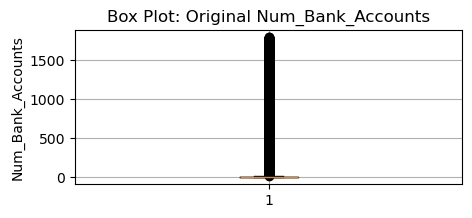

In [40]:
#Num_Bank_Accounts
original_bank_accounts = df['Num_Bank_Accounts']

# Plot the original data to observe outliers
plt.figure(figsize=(5, 2))
plt.boxplot(original_bank_accounts.dropna())
plt.title('Box Plot: Original Num_Bank_Accounts')
plt.ylabel('Num_Bank_Accounts')
plt.grid(True)
plt.show()

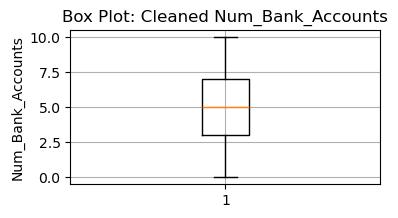

In [41]:
from math import trunc
cf = df.copy()
# Replace values less than 0 or greater than 10 with NaN
cf.loc[(cf['Num_Bank_Accounts'] < 0) | (cf['Num_Bank_Accounts'] > 10), 'Num_Bank_Accounts'] = np.nan
# Fill NaN values with the median value grouped by 'Customer_ID'
cf['Num_Bank_Accounts'] = cf.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.fillna(trunc(x.median())))
# Update the original DataFrame with cleaned values
df.update(cf)

# Plot the cleaned data to confirm outliers are handled
plt.figure(figsize=(4, 2))
plt.boxplot(cf['Num_Bank_Accounts'].dropna())
plt.title('Box Plot: Cleaned Num_Bank_Accounts')
plt.ylabel('Num_Bank_Accounts')
plt.grid(True)
plt.show()

**Num_Credit_Card**

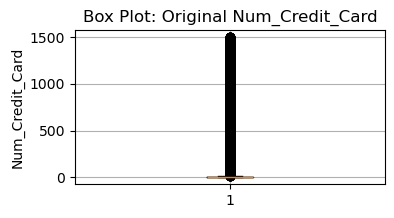

In [42]:
cf = df.copy()
d1 = cf['Num_Credit_Card']

plt.figure(figsize=(4, 2))
plt.boxplot(d1.dropna())
plt.title('Box Plot: Original Num_Credit_Card')
plt.ylabel('Num_Credit_Card')
plt.grid(True)
plt.show()

In [43]:
cf.loc[(cf['Num_Credit_Card'] < 0) | (cf['Num_Credit_Card'] > 10), 'Num_Credit_Card'] = np.nan
cf['Num_Credit_Card'] = cf.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.fillna(trunc(x.median())))

d2 = cf['Num_Credit_Card']
df.update(cf)

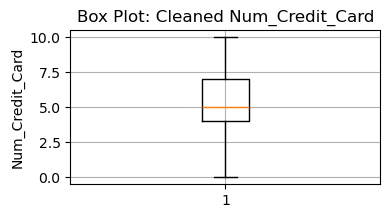

In [44]:
plt.figure(figsize=(4, 2))
plt.boxplot(d2.dropna())
plt.title('Box Plot: Cleaned Num_Credit_Card')
plt.ylabel('Num_Credit_Card')
plt.grid(True)
plt.show()

**Interest_Rate**

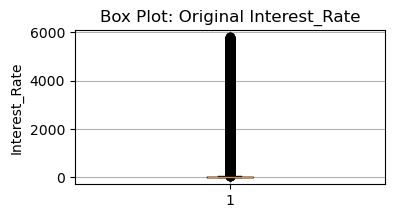

In [45]:
cf = df.copy()
d1 = cf['Interest_Rate']

plt.figure(figsize=(4, 2))
plt.boxplot(d1.dropna())
plt.title('Box Plot: Original Interest_Rate')
plt.ylabel('Interest_Rate')
plt.grid(True)
plt.show()

In [46]:
cf.loc[(cf['Interest_Rate'] > 35), 'Interest_Rate'] = np.nan
cf['Interest_Rate'] = cf.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.fillna(trunc(x.mean())))

d2 = cf['Interest_Rate']
df.update(cf)

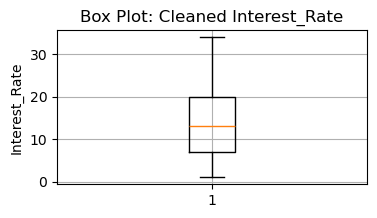

In [47]:
plt.figure(figsize=(4, 2))
plt.boxplot(d2.dropna())
plt.title('Box Plot: Cleaned Interest_Rate')
plt.ylabel('Interest_Rate')
plt.grid(True)
plt.show()

**Num_of_Loan**

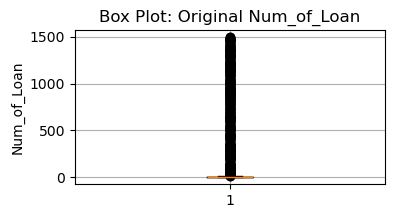

In [48]:
# Remove special characters and convert to numeric
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'].str.extract(r'(\d+)')[0], errors='coerce')

px = df.copy()
d1 = px['Num_of_Loan']

plt.figure(figsize=(4, 2))
plt.boxplot(d1.dropna())
plt.title('Box Plot: Original Num_of_Loan')
plt.ylabel('Num_of_Loan')
plt.grid(True)
plt.show()

In [49]:
# --- Num_of_Loan: Handle Outliers ---
px.loc[(px['Num_of_Loan'] > 10), 'Num_of_Loan'] = np.nan
px['Num_of_Loan'] = px.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.fillna(trunc(x.mean())))

d2 = px['Num_of_Loan']
df.update(px)

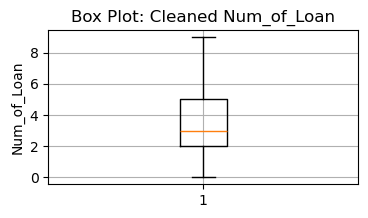

In [50]:
plt.figure(figsize=(4, 2))
plt.boxplot(d2.dropna())
plt.title('Box Plot: Cleaned Num_of_Loan')
plt.ylabel('Num_of_Loan')
plt.grid(True)
plt.show()

**Outstanding_Debt**

In [51]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.strip('_').astype(float)

**Changed_Credit_Limit**

In [52]:
# Update the offset values with the median of the customers cummulative values
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace({'_': np.nan})
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.fillna(x.median()))

**Credit_Mix**

In [53]:
# Replace '_' with the mode value for each customer
df['Credit_Mix'] = df['Credit_Mix'].replace({'_': np.nan})
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode().values[0]))

**Amount_invested_monthly**

In [54]:
# Update the offset values with the mean
df.loc[(df['Amount_invested_monthly'] == '__10000__') | (df['Amount_invested_monthly'] == '0.0'), 'Amount_invested_monthly'] = np.nan
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)


df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))

**Payment_Behaviour**

In [55]:
# Replace '!@9#%8' with the mode value for each customer
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({'!@9#%8': np.nan})
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode().values[0]))

**Payment_of_Min_Amount**

In [56]:
# Replace NM with the most occuring value for a customer
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'NM': np.nan})
df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.fillna(x.mode().values[0]))

**Num_of_Delayed_Payment**

In [57]:
# Update the offset values with the median of the customers cummulative values
df.loc[(px['Num_of_Delayed_Payment'] > 30), 'Num_of_Delayed_Payment'] = np.nan
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(trunc(x.mean())))

**Num_Credit_Inquiries**

In [58]:
# Update the offset values with the median of the customers cummulative values
px = df.copy()
px.loc[(px['Num_Credit_Inquiries'] > 20), 'Num_Credit_Inquiries'] = np.nan
px['Num_Credit_Inquiries'] = px.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(trunc(x.mean())))

df.update(px)

**Annual_Income**

In [59]:
# Replaces each group's Annual_Income with its group's median
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform('median')

**Total_EMI_per_month**

In [60]:
# Update the offset values with the median of the customers cummulative values
df['Total_EMI_per_month'] = df.groupby('Customer_ID')['Total_EMI_per_month'].transform('median')

**Monthly_Balance**

In [61]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'].astype(str).str.replace("_", "", regex=False).str.strip(), errors='coerce')

In [62]:
print(df['Monthly_Balance'].isna().sum())

0


In [63]:
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(
    df.groupby('Customer_ID')['Monthly_Balance'].transform('mean'))

In [64]:
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

**Credit_Score**

In [65]:
df["Credit_Score"] = df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0, 1, 2]).astype("int64")

C:\Users\Dell\AppData\Local\Temp\ipykernel_10408\3665804280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Credit_Score"] = df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0, 1, 2]).astype("int64")


In [66]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94378 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        94378 non-null  object 
 1   Customer_ID               94378 non-null  object 
 2   Month                     94378 non-null  object 
 3   Name                      94378 non-null  object 
 4   Age                       94378 non-null  Int64  
 5   SSN                       94378 non-null  object 
 6   Occupation                94378 non-null  object 
 7   Annual_Income             94378 non-null  float64
 8   Monthly_Inhand_Salary     94378 non-null  float64
 9   Num_Bank_Accounts         94378 non-null  int64  
 10  Num_Credit_Card           94378 non-null  int64  
 11  Interest_Rate             94378 non-null  int64  
 12  Num_of_Loan               94378 non-null  int64  
 13  Type_of_Loan              94378 non-null  object 
 14  Delay_from_

In [68]:
#calculating the statistical data.
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,94378.0,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,94378.000000,9.437800e+04,94378.000000
mean,33.314364,49978.748035,4164.702065,5.363739,5.531978,14.512853,3.513234,21.041101,13.325934,10.382551,5.768585,1422.185473,32.306335,107.235896,187.644065,-2.825517e+22,0.887982
std,10.76908,38067.710703,3175.297942,2.590049,2.064290,8.734135,2.441118,14.848431,6.252282,6.771924,3.861540,1151.459338,5.107205,238.137031,180.697489,3.068826e+24,0.674381
min,14.0,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.881250,0.000000,10.010194,-3.333333e+26,0.000000
25%,24.0,19243.900000,1621.078333,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.340000,3.000000,565.940000,28.076265,28.902339,72.891553,2.700574e+02,0.000000
50%,33.0,36603.850000,3060.648333,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1163.470000,32.326922,65.739050,128.405780,3.366158e+02,1.000000
75%,42.0,70978.440000,5911.683333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.820000,8.000000,1936.410000,36.512063,143.526826,231.405034,4.696109e+02,1.000000
max,56.0,179987.280000,15204.633333,10.000000,10.000000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,21627.117104,1646.388176,1.602041e+03,2.000000


In [69]:
df.shape

(94378, 28)

**Distribution of age**

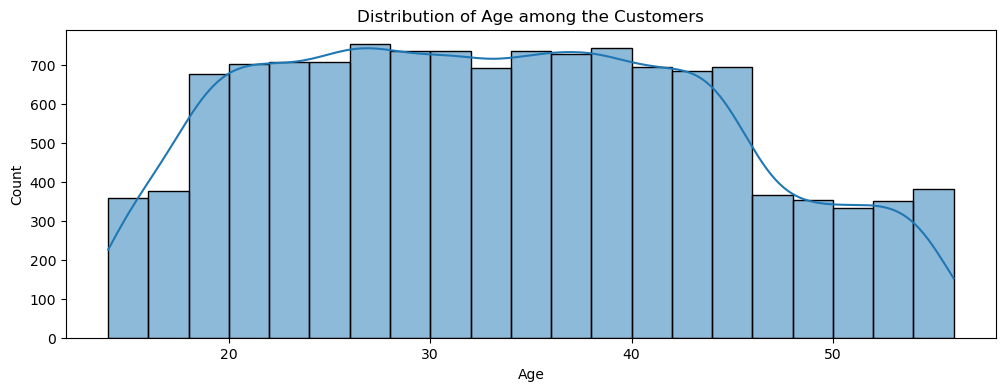

In [70]:
ax = df.groupby('Customer_ID')['Age'].median()

plt.figure(figsize=(12, 4))
sns.histplot(data=ax, binwidth=2, kde=True)
plt.title('Distribution of Age among the Customers')
plt.show()

**Total annual income in a given occupation**

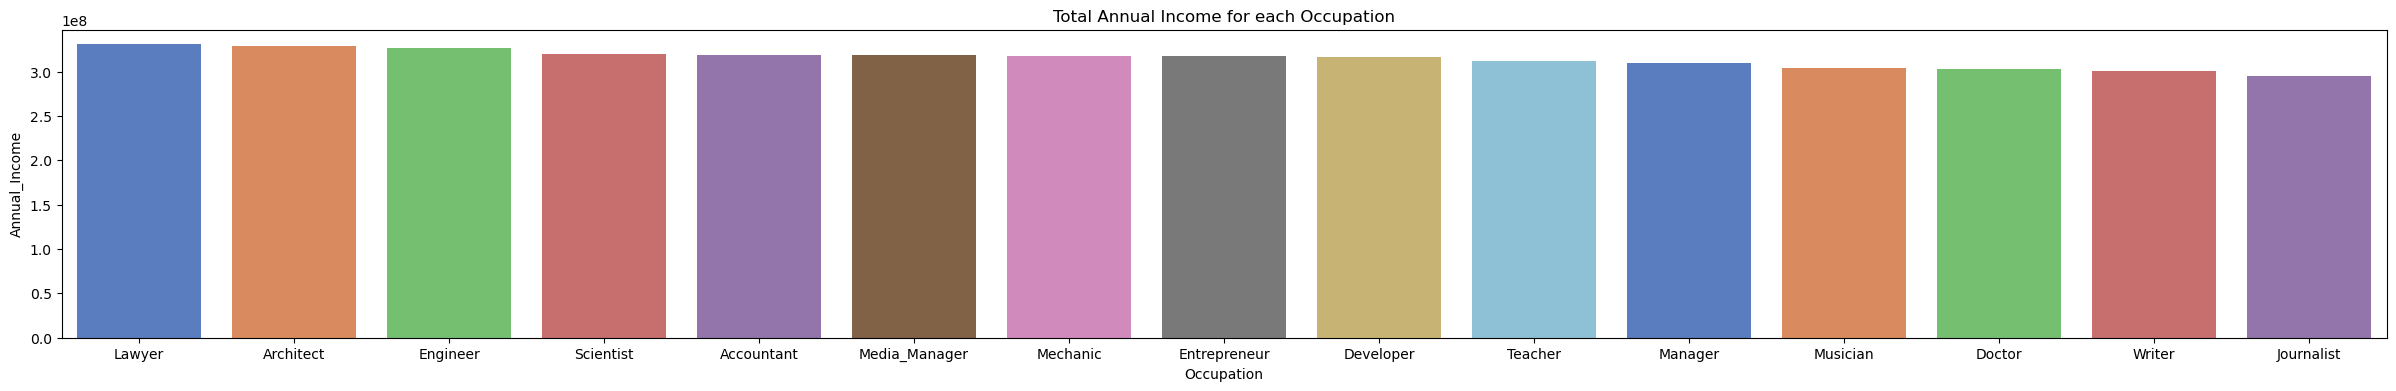

In [71]:
cx = df.groupby('Occupation')['Annual_Income'].sum().reset_index().sort_values(by='Annual_Income', ascending=False)

plt.figure(figsize=(30, 4))
sns.barplot(data=cx, x='Occupation', y='Annual_Income', hue='Occupation', palette='muted')
plt.title('Total Annual Income for each Occupation')
plt.show()

In [72]:
# Label Encoding
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

**Correlation Plot**

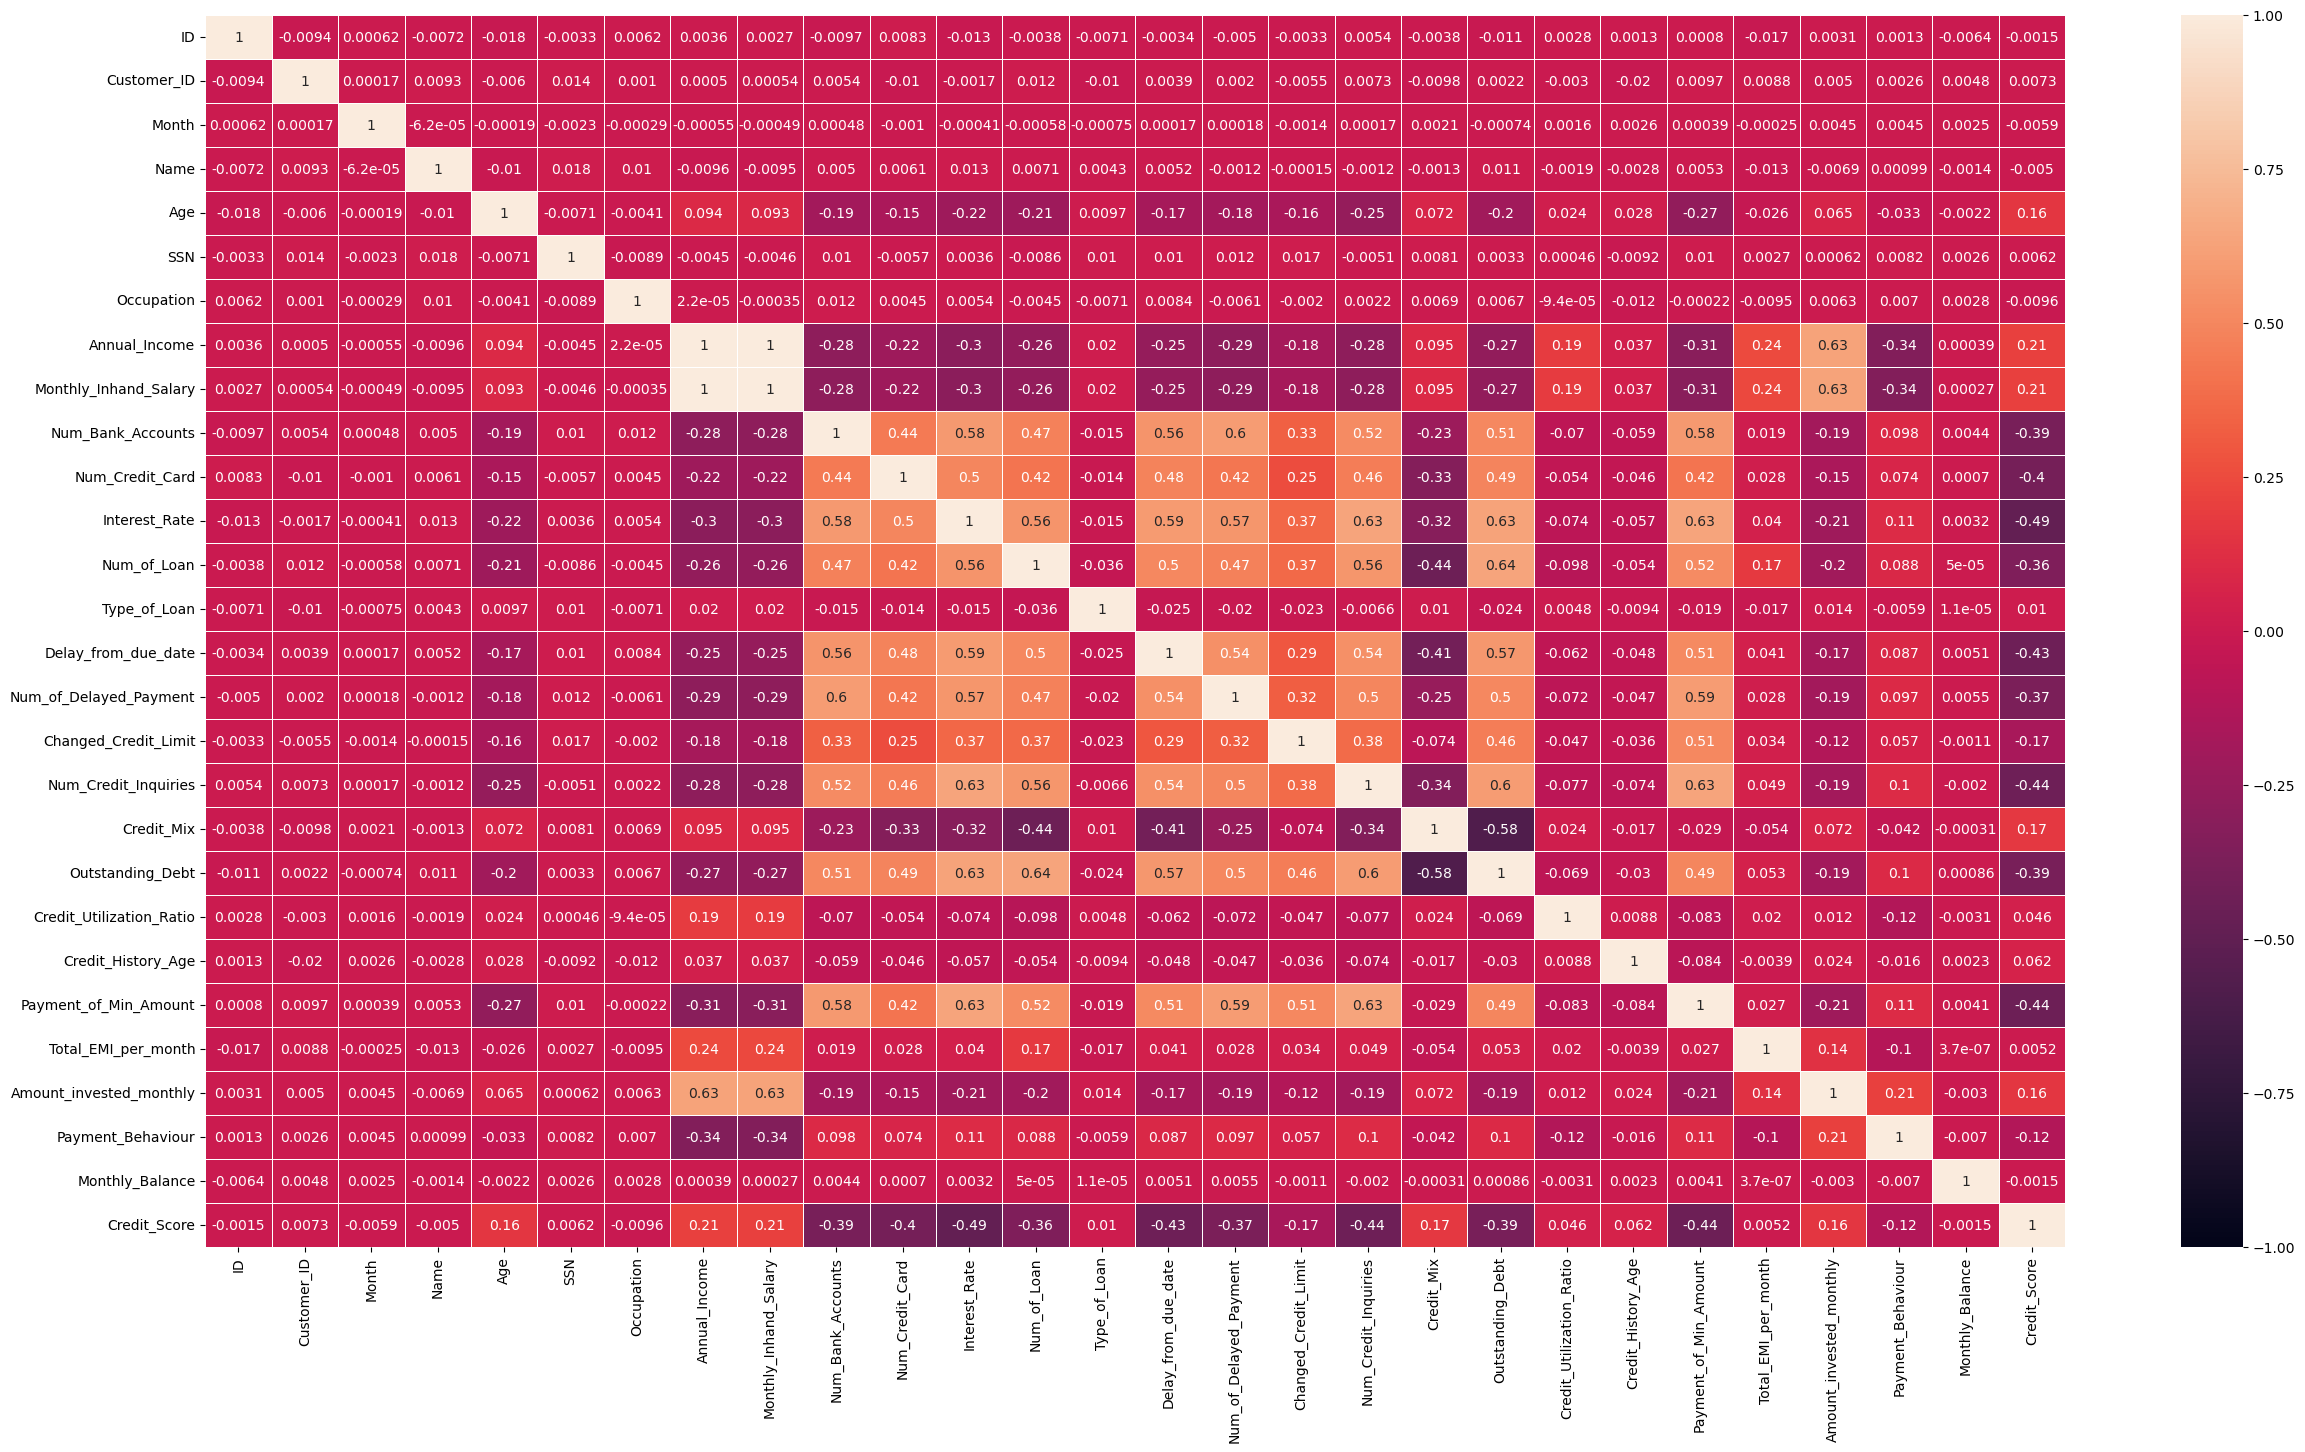

In [73]:
plt.figure(figsize=(30, 16))
sns.heatmap(df.corr(), linewidths=.5, annot=True, vmax=1, vmin=-1)
plt.show()

## Model Building

In [74]:
x = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
'''
Standardisation is import for distance based aldorithms like logistic regression and SVM

In Logistic Regression :
- The gradient is influenced by the scale of the features.
- If one feature has a large range (e.g., Annual_Income) and another a small range (e.g., Age),
  the larger-scale feature will dominate the loss function, making optimization harder and less stable.

SVM is very sensitive to feature scales because:
- Distance calculations (e.g.,∥xi −xj∥) assume features are on similar scales.
- Features with larger scales dominate the distance.
- This can cause biased margins, poor separation, and bad model performance.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression Model

In [77]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_lr)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.655276541640178
Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.53      0.59      5381
           1       0.68      0.75      0.71     10089
           2       0.59      0.57      0.58      3406

    accuracy                           0.66     18876
   macro avg       0.64      0.62      0.62     18876
weighted avg       0.65      0.66      0.65     18876



,Actual,Predicted
37342,1,1
13372,1,1
56848,1,1
1234,2,2
73085,2,1
...,...,...
87916,1,2
49655,0,0
11473,0,0
62710,1,2


### Decision Tree Classifier Model

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

accuracy_dtc = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_dtc)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.7210743801652892
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      5381
           1       0.75      0.75      0.75     10089
           2       0.68      0.67      0.68      3406

    accuracy                           0.72     18876
   macro avg       0.71      0.71      0.71     18876
weighted avg       0.72      0.72      0.72     18876



,Actual,Predicted
37342,1,2
13372,1,1
56848,1,1
1234,2,2
73085,2,2
...,...,...
87916,1,1
49655,0,0
11473,0,0
62710,1,1


### Random Forest Classifier Model

In [79]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_rfc)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.8172282263191354
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      5381
           1       0.84      0.82      0.83     10089
           2       0.80      0.77      0.78      3406

    accuracy                           0.82     18876
   macro avg       0.81      0.81      0.81     18876
weighted avg       0.82      0.82      0.82     18876



,Actual,Predicted
37342,1,1
13372,1,1
56848,1,1
1234,2,2
73085,2,2
...,...,...
87916,1,2
49655,0,0
11473,0,0
62710,1,0


### SVC model

In [80]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
y_pred = svc_model.predict(x_test_scaled)

accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_svc)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.7275905912269549
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.67      0.70      5381
           1       0.77      0.76      0.77     10089
           2       0.60      0.72      0.66      3406

    accuracy                           0.73     18876
   macro avg       0.71      0.72      0.71     18876
weighted avg       0.73      0.73      0.73     18876



,Actual,Predicted
37342,1,1
13372,1,1
56848,1,1
1234,2,2
73085,2,2
...,...,...
87916,1,2
49655,0,0
11473,0,0
62710,1,2


# Comparing Accuracy of different model

In [81]:
print("Logistic Regression Accuracy : ",accuracy_lr)
print("Decision Tree Accuracy       : ",accuracy_dtc)
print("Random Forest Accuracy       : ",accuracy_rfc)
print("SVC Accuracy                 : ",accuracy_svc)

# Best model
accuracies = {
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dtc,
    "Random Forest": accuracy_rfc,
    "SVC": accuracy_svc
}

best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy}")

Logistic Regression Accuracy :  0.655276541640178
Decision Tree Accuracy       :  0.7210743801652892
Random Forest Accuracy       :  0.8172282263191354
SVC Accuracy                 :  0.7275905912269549

Best Model: Random Forest with Accuracy: 0.8172282263191354


In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,  # Try 10 combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001724BA5DF10>},
                   random_state=42, scoring='accuracy')

In [85]:
y_pred =random_search.predict(x_test)
accuracy_rfc_hpt = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_rfc_hpt)
print("Classification Report :\n",classification_report(y_test, y_pred))

Accuracy Score :  0.81728120364484
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      5381
           1       0.84      0.82      0.83     10089
           2       0.80      0.77      0.78      3406

    accuracy                           0.82     18876
   macro avg       0.81      0.81      0.81     18876
weighted avg       0.82      0.82      0.82     18876

